<a href="https://colab.research.google.com/github/WanPgui/Summative-Assignment---Model-Training-and-Evaluation/blob/main/Summative_Intro_to_ml_%5BPeris_Wangui%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import chardet

# The Dataset
> ***Brief Description:***
Problem Statement
Effective patient care relies on accurate predictions of hospital readmission, treatment effectiveness, and early detection of potential health risks. However, traditional healthcare systems struggle with fragmented data, leading to inefficiencies in decision-making and increased healthcare costs.

This project leverages machine learning to analyze electronic health records (EHRs), improving predictive insights for better patient management. By developing classification models, we aim to predict whether a patient will be readmitted based on historical health data, optimizing treatment plans and enhancing hospital resource allocation.

Dataset Description
The dataset, sourced from Kaggle (diabetic_data.csv), contains over 100,000 patient records collected from 130 hospitals in the U.S. It includes:

Demographics (age, gender, race)
Medical history (number of diagnoses, admission type)
Medications (prescribed drugs and changes)
Hospital encounters (length of stay, discharge details)
The target variable for classification is "diabetesMed", indicating whether the medication the  patient was given after being  readmitted to the hospital within 30 days.Diabetes is a chronic disease that requires continuous monitoring and management. Effective patient care relies on accurate predictions of hospital readmission, medication adjustments, and early detection of complications.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [ ]:
# Load dataset
dataframe = pd.read_csv("diabetic_data.csv")

# Print the first few rows and column names
print(dataframe.head())
print(dataframe.columns)

# Strip whitespace from column names
dataframe.columns = dataframe.columns.str.strip()

# Preprocess the data
dataframe.replace('?', pd.NA, inplace=True)
dataframe.dropna(inplace=True)

# Check unique values in 'readmitted' column to understand its structure
print(dataframe['readmitted'].unique())

# Encode the 'readmitted' column using one-hot encoding
dataframe = pd.get_dummies(dataframe, columns=['readmitted'], drop_first=True)

# Print the new columns to verify the encoding
print("Encoded columns:", dataframe.columns)

# Check for the available encoded 'readmitted' columns
readmitted_column = [col for col in dataframe.columns if 'readmitted' in col]

# Check if the readmitted_column list is empty
if not readmitted_column:
    print("No 'readmitted' column found after encoding.")
else:
    print("Found readmitted columns:", readmitted_column)

# If readmitted columns are found, use the first one as the target variable
if readmitted_column:
    y = dataframe[readmitted_column[0]]  # This will dynamically pick the first 'readmitted' column

    # Split features and labels
    X = dataframe.drop(readmitted_column, axis=1, errors='ignore')  # Drop the readmitted columns
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check the shapes of X_train, X_test, y_train, and y_test
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
else:
    print("No target variable found, check the preprocessing steps.")


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
print(dataframe.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [ ]:
# Drop 'diabetesMed' column from the features
X = dataframe.drop(['diabetesMed'], axis=1)

# Define 'diabetesMed' as the target variable
y = dataframe['diabetesMed']


In [ ]:
print(X.shape)


(0, 48)


In [ ]:
print(X.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object')


In [ ]:

# Step 1: Load the dataset
df = pd.read_csv('diabetic_data.csv')

# Step 2: Display basic information and check for missing values

print("Dataset info:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 3: Handle missing values (if any)

df_filled = df.fillna(df.mode().iloc[0])

# Step 4: Separate the features (X) and the target variable (y)

X = df_filled.drop('diabetesMed', axis=1)
y = df_filled['diabetesMed']

# Step 5: Encode categorical features (one-hot encoding)
X_encoded = pd.get_dummies(X)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 7: Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Print the shape of the data after preprocessing
print("\nShape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

# Optionally, inspect the first few rows of the processed data
print("\nFirst few rows of X_train_scaled:")
print(pd.DataFrame(X_train_scaled).head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  in

In [ ]:
print("Columns in X_encoded:", X_encoded.columns)


Columns in X_encoded: Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient',
       ...
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-rosiglitazone_Steady', 'metformin-pioglitazone_No',
       'metformin-pioglitazone_Steady', 'change_Ch', 'change_No',
       'readmitted_<30', 'readmitted_>30', 'readmitted_NO'],
      dtype='object', length=2471)


In [ ]:
X_encoded.head()


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,readmitted_<30,readmitted_>30,readmitted_NO
0,2278392,8222157,6,25,1,1,41,0,1,0,...,False,True,False,True,False,False,True,False,False,True
1,149190,55629189,1,1,7,3,59,0,18,0,...,False,True,False,True,False,True,False,False,True,False
2,64410,86047875,1,1,7,2,11,5,13,2,...,False,True,False,True,False,False,True,False,False,True
3,500364,82442376,1,1,7,2,44,1,16,0,...,False,True,False,True,False,True,False,False,False,True
4,16680,42519267,1,1,7,1,51,0,8,0,...,False,True,False,True,False,True,False,False,False,True


In [ ]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Fill missing values for numerical columns with the mean
X_filled_numerical = X[numerical_cols].fillna(X[numerical_cols].mean())

# Fill missing values for categorical columns with the most frequent value
X_filled_categorical = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Combine the filled numerical and categorical columns back
X_filled = pd.concat([X_filled_numerical, X_filled_categorical], axis=1)

# Now, you can proceed with encoding if needed
X_encoded = pd.get_dummies(X_filled)


In [ ]:
# Print the shape of X before any preprocessing
print("Original Shape of X:", X.shape)

# Check for missing values in the original X
print("Missing values in X before preprocessing:")
print(X.isnull().sum())

# Check the number of unique values in categorical columns before encoding
categorical_cols = X.select_dtypes(include=['object']).columns
print("Number of unique values in each categorical column:")
print(X[categorical_cols].nunique())

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Fill missing values for numerical columns with the median
X_filled_numerical = X[numerical_cols].fillna(X[numerical_cols].median())

# Fill missing values for categorical columns with the most frequent value (mode)
X_filled_categorical = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Combine the filled numerical and categorical columns back
X_filled = pd.concat([X_filled_numerical, X_filled_categorical], axis=1)

# Now, you can proceed with encoding if needed
X_encoded = pd.get_dummies(X_filled)



Original Shape of X: (101766, 49)
Missing values in X before preprocessing:
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide               

In [ ]:
print(X.shape)

(101766, 49)


In [ ]:
# Split into features (X) and target (y)
X = df.drop('diabetesMed', axis=1)
y = df['diabetesMed']


#SECTION 1: Model Architecture:

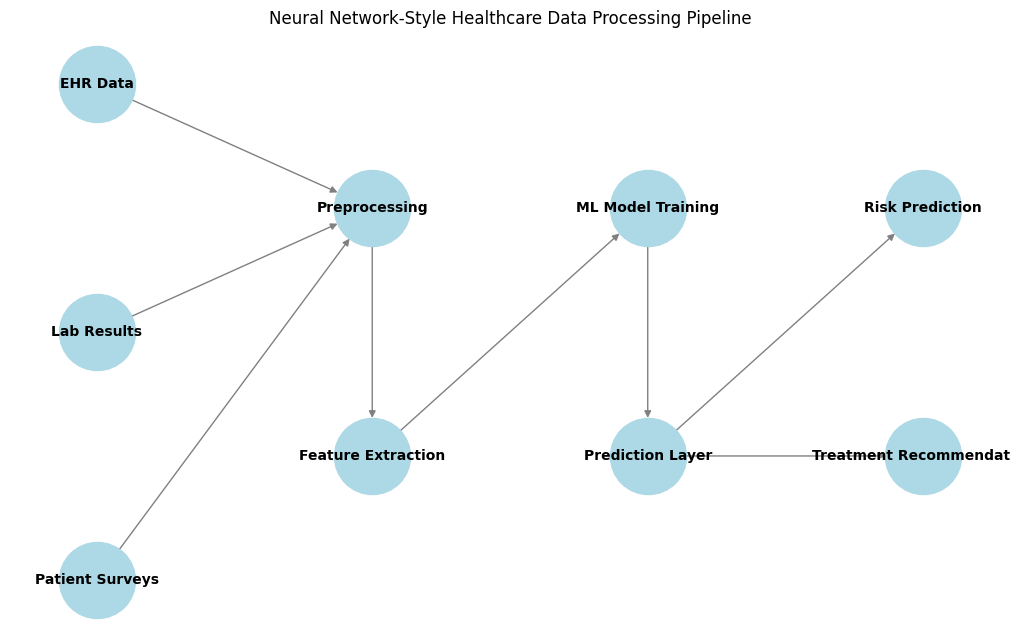




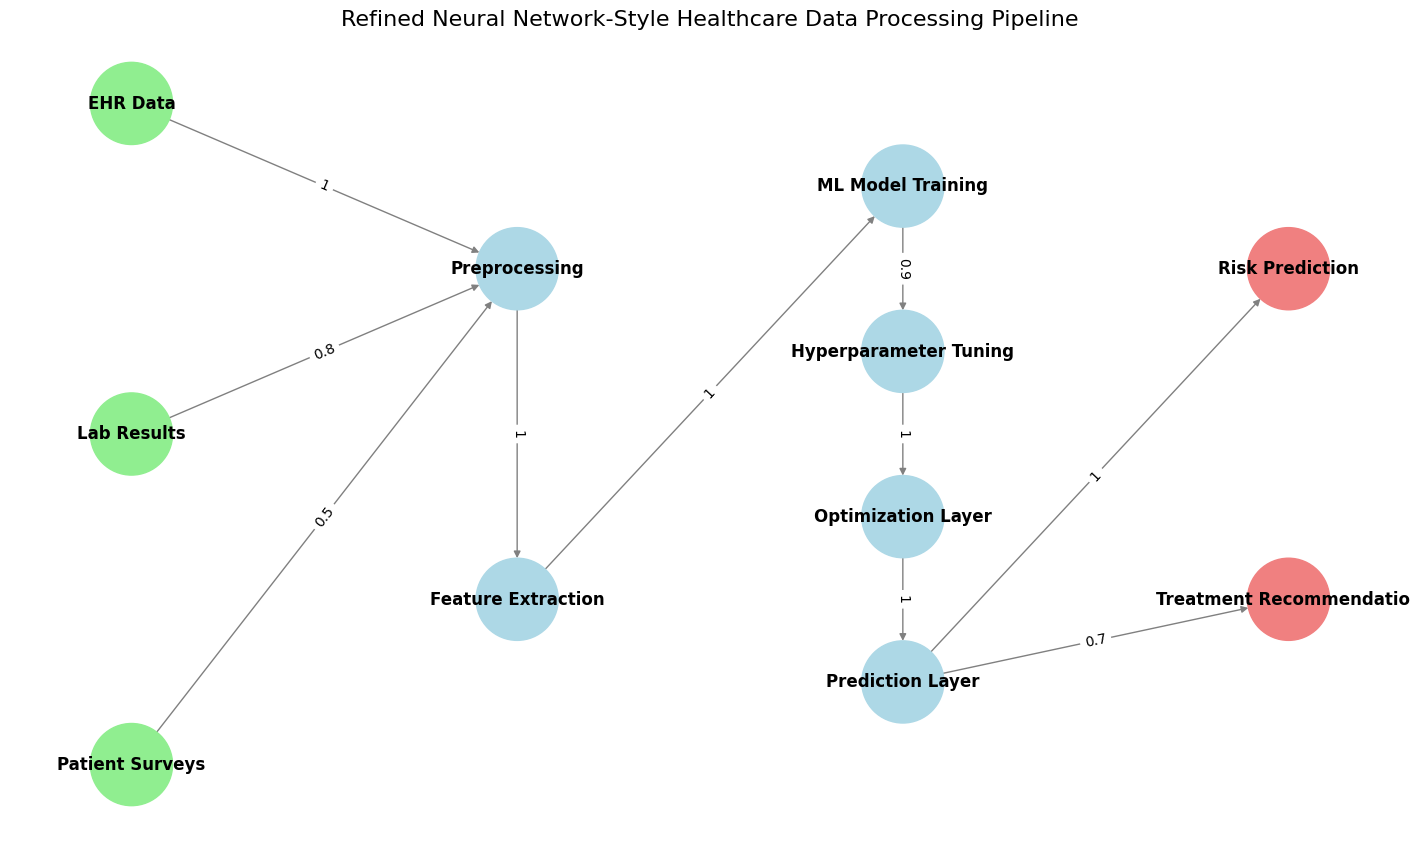

In [ ]:

# Function to visualize the refined model architecture
def visualize_model_architecture():
    G = nx.DiGraph()

    # Define layers of the neural network
    input_nodes = ["EHR Data", "Lab Results", "Patient Surveys"]
    hidden_nodes1 = ["Preprocessing", "Feature Extraction"]
    hidden_nodes2 = ["ML Model Training", "Hyperparameter Tuning", "Optimization Layer", "Prediction Layer"]
    output_nodes = ["Risk Prediction", "Treatment Recommendation"]

    # Add nodes to the graph
    for node in input_nodes + hidden_nodes1 + hidden_nodes2 + output_nodes:
        G.add_node(node)

    # Add edges (connections with weights)
    edges = [
        ("EHR Data", "Preprocessing", 1), ("Lab Results", "Preprocessing", 0.8), ("Patient Surveys", "Preprocessing", 0.5),
        ("Preprocessing", "Feature Extraction", 1),
        ("Feature Extraction", "ML Model Training", 1),
        ("ML Model Training", "Hyperparameter Tuning", 0.9),
        ("Hyperparameter Tuning", "Optimization Layer", 1),
        ("Optimization Layer", "Prediction Layer", 1),
        ("Prediction Layer", "Risk Prediction", 1), ("Prediction Layer", "Treatment Recommendation", 0.7)
    ]

    G.add_weighted_edges_from(edges)

    # Set up the layout
    pos = {
        "EHR Data": (-3, 2), "Lab Results": (-3, 0), "Patient Surveys": (-3, -2),
        "Preprocessing": (-1, 1), "Feature Extraction": (-1, -1),
        "ML Model Training": (1, 1.5), "Hyperparameter Tuning": (1, 0.5), "Optimization Layer": (1, -0.5), "Prediction Layer": (1, -1.5),
        "Risk Prediction": (3, 1), "Treatment Recommendation": (3, -1)
    }

    # Define color schemes for different layers
    layer_colors = {
        "input": "lightgreen",
        "hidden": "lightblue",
        "output": "lightcoral"
    }

    # Assign colors to nodes based on their layer type
    node_colors = []
    for node in G.nodes:
        if node in input_nodes:
            node_colors.append(layer_colors["input"])
        elif node in hidden_nodes1 + hidden_nodes2:
            node_colors.append(layer_colors["hidden"])
        else:
            node_colors.append(layer_colors["output"])

    # Draw the graph with enhanced aesthetics
    plt.figure(figsize=(14, 8))
    nx.draw(G, pos, with_labels=True, node_size=3500, node_color=node_colors, font_size=12, font_weight="bold", arrows=True, edge_color="gray")

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="black")

    # Title and visual settings
    plt.title("Refined Neural Network-Style Healthcare Data Processing Pipeline", fontsize=16)
    plt.axis("off")

    # Save and show the plot
    plt.savefig("refined_model_architecture.png", format="PNG", bbox_inches="tight")
    plt.show()

# Call the function to visualize the refined architecture
visualize_model_architecture()


In [ ]:
from keras.layers import Input

input_layer = Input(shape=(X_train_scaled.shape[1],))



In [ ]:
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)


X_train shape: (81412, 2471)
y_train shape: (81412,)


In [ ]:
# If y_train is not numeric, you need to encode it:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

# Check the transformed values
print(y_train[:10])


[0 0 1 1 0 1 1 1 0 1]


In [ ]:
# Convert boolean columns to numeric (0, 1)
X_train = X_train.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
X_test = X_test.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)


In [ ]:
x_train = df['diag_3']
y_test = df['diabetesMed']


In [ ]:
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)


X_train shape: (81412, 2471)
y_train shape: (81412,)


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure X and y have the same number of rows
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Split data correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check new shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X shape: (101766, 49), y shape: (101766,)
X_train shape: (81412, 49), y_train shape: (81412,)
X_test shape: (20354, 49), y_test shape: (20354,)


In [ ]:
print(f"Original feature count: {X_train.shape[1]}")
print(f"Encoded feature count: {X_train_scaled.shape[1]}")


Original feature count: 49
Encoded feature count: 2471


In [ ]:
print(f"Final X_train shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
print(f"Final X_test shape: {X_test_scaled.shape}, y_test shape: {y_test.shape}")


Final X_train shape: (81412, 2471), y_train shape: (81412,)
Final X_test shape: (20354, 2471), y_test shape: (20354,)


In [ ]:
# Convert categorical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Epoch 1/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9291 - loss: 0.1521 - val_accuracy: 0.9891 - val_loss: 0.0292
Epoch 2/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.9926 - val_loss: 0.0203
Epoch 3/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9983 - loss: 0.0041 - val_accuracy: 0.9941 - val_loss: 0.0175
Epoch 4/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9951 - val_loss: 0.0273
Epoch 5/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.9952 - val_loss: 0.0306
Epoch 6/50
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9997 - loss: 8.9881e-04 - val_accuracy: 0.9954 - val_loss: 0.0284
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9960 - loss: 0.0253
Final Model Accuracy: 1.00
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4608
           1       1.00      1.00      1.00     15746

    accuracy                           1.00     20354
   macro avg       0.99      0.99      0.99     20354
weighted avg       1.00      1.00      1.00     20354

Healthcare model saved as 'saved_models/healthcare_model.h5'.


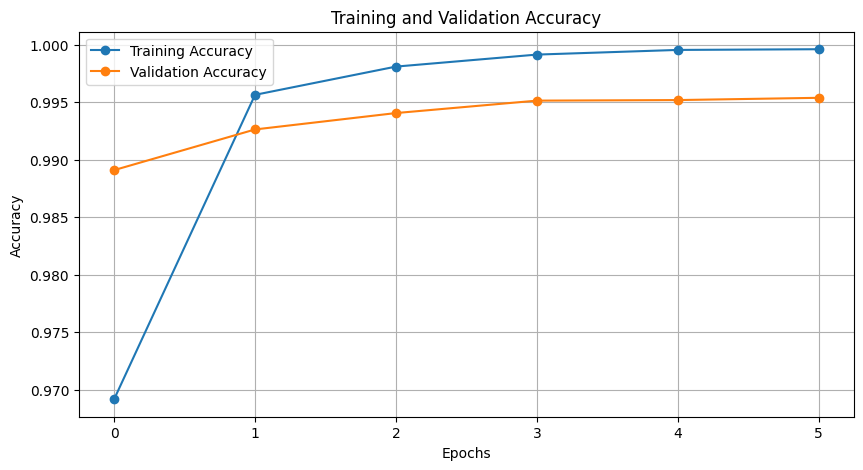

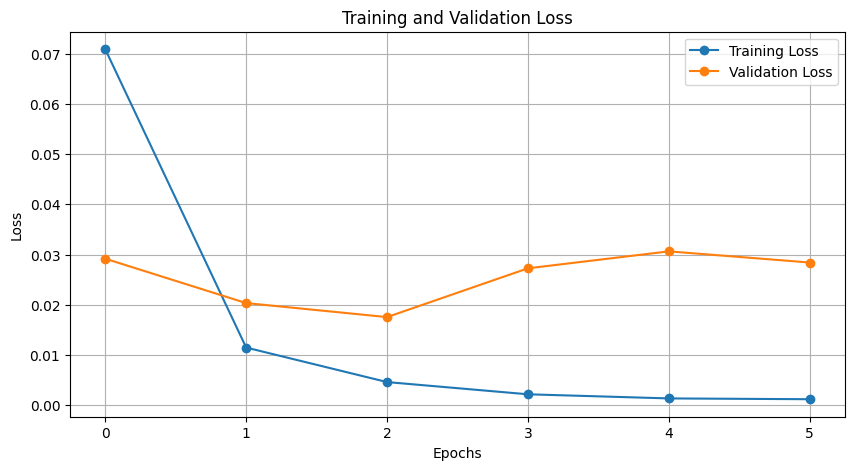

Confusion Matrix:
 [[ 4569    39]
 [   55 15691]]


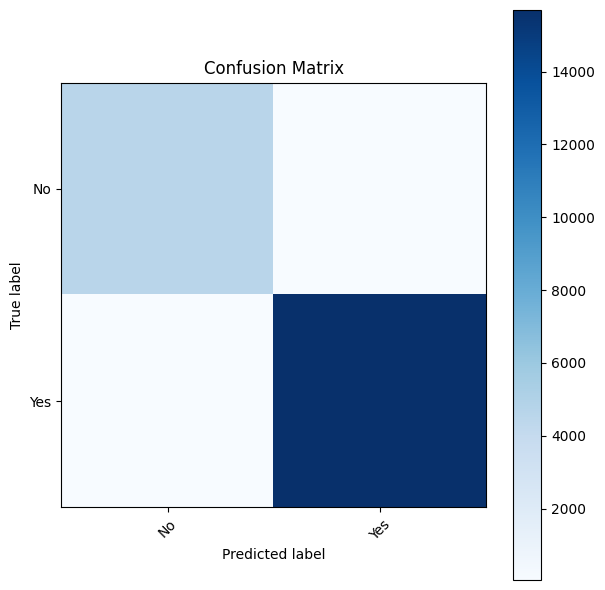

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Define the model function
def define_healthcare_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu', name='Preprocessing'),
        Dense(32, activation='relu', name='FeatureExtraction'),
        Dense(16, activation='relu', name='MLModelTraining'),
        Dense(1, activation='sigmoid', name='PredictionLayer')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Ensure X_train_scaled is a NumPy array
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

# Define input shape based on features
input_shape = X_train_scaled.shape[1]

# Create model
model = define_healthcare_model(input_shape)

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Final Model Accuracy: {accuracy:.2f}")

# Print Classification Metrics
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Predict probabilities and convert to binary class labels

print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model
model.save('saved_models/healthcare_model.h5')
print("Healthcare model saved as 'saved_models/healthcare_model.h5'.")

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No', 'Yes'], rotation=45)
plt.yticks(tick_marks, ['No', 'Yes'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


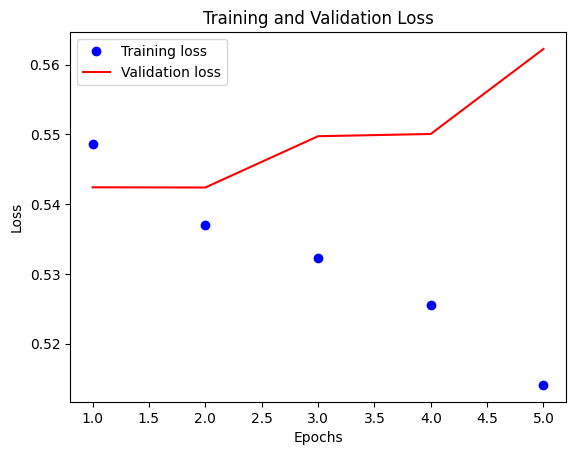

In [ ]:
# Function to plot the loss curve
def loss_curve_plot(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the loss curve
loss_curve_plot(history)



In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

def define_healthcare_model(input_shape):
    # Initialize the model
    model = models.Sequential()

    # Input layer (EHR Data, Lab Results, Patient Surveys)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Preprocessing layer
    model.add(layers.Dense(64, activation='relu', name='Preprocessing'))

    # Feature extraction layer
    model.add(layers.Dense(32, activation='relu', name='Feature Extraction'))

    # ML Model Training layer
    model.add(layers.Dense(16, activation='relu', name='ML Model Training'))

    # Prediction layer
    model.add(layers.Dense(2, activation='sigmoid', name='Prediction Layer'))  # 2 outputs for risk prediction and treatment recommendation

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


#Task: Define a function that creates models without and With specified Optimization techniques


In [125]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Define the model creation function with tunable hyperparameters
def define_healthcare_model(input_shape, model_type="basic", hp=None):
    model = Sequential()

    # Use the Input layer instead of passing input_shape directly to Dense
    model.add(Input(shape=(input_shape,)))

    # Learning rate tuning
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=0.001)

    # Model Architectures
    if model_type == "basic":
        model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))  # Binary classification
        optimizer = Adam(learning_rate=learning_rate)

    elif model_type == "l2_regularization":
        l2_rate = hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=0.01)
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_rate), input_shape=(input_shape,)))
        model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_rate)))
        model.add(Dense(16, activation='relu', kernel_regularizer=l2(l2_rate)))
        model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(learning_rate=learning_rate)

    elif model_type == "dropout":
        dropout_rate_1 = hp.Float('dropout_rate_1', min_value=0.2, max_value=0.5, step=0.05, default=0.3)
        dropout_rate_2 = hp.Float('dropout_rate_2', min_value=0.2, max_value=0.5, step=0.05, default=0.2)
        model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
        model.add(Dropout(dropout_rate_1))  # Dropout layer to prevent overfitting
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(dropout_rate_2))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(learning_rate=learning_rate)

    elif model_type == "batch_norm":
        model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
        model.add(BatchNormalization())  # Normalize activations
        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(learning_rate=learning_rate)

    elif model_type == "sgd_momentum":
        momentum = hp.Float('momentum', min_value=0.5, max_value=0.99, step=0.05, default=0.9)
        model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

    else:
        raise ValueError("Invalid model type! Choose from ['basic', 'l2_regularization', 'dropout', 'batch_norm', 'sgd_momentum']")

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning using Keras Tuner for all model types
def tune_hyperparameters(input_shape=49):
    model_types = ["basic", "l2_regularization", "dropout", "batch_norm", "sgd_momentum"]

    for model_type in model_types:
        tuner = kt.Hyperband(
            lambda hp: define_healthcare_model(input_shape, model_type, hp),
            objective='val_accuracy',
            max_epochs=15,  # Increased max epochs for better convergence
            factor=3,
            directory='kt_dir',
            project_name=model_type
        )

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Perform search with your training data
        tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[early_stopping])
        best_hps = tuner.get_best_hyperparameters(1)[0]

        print(f"Best Hyperparameters for {model_type}: {best_hps.values}")

        # Save the best model
        best_model = tuner.hypermodel.build(best_hps)
        best_model.save(f'saved_models/{model_type.replace(" ", "_")}_model.keras')

# Example for tuning all models
tune_hyperparameters(input_shape=49)





Reloading Tuner from kt_dir/basic/tuner0.json
Best Hyperparameters for basic: {'learning_rate': 0.0032383002350898776, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0018'}
Reloading Tuner from kt_dir/l2_regularization/tuner0.json
Best Hyperparameters for l2_regularization: {'learning_rate': 0.002581019106412419, 'l2_rate': 1.1752057080609438e-05, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reloading Tuner from kt_dir/dropout/tuner0.json
Best Hyperparameters for dropout: {'learning_rate': 0.002584098952851939, 'dropout_rate_1': 0.30000000000000004, 'dropout_rate_2': 0.2, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
Reloading Tuner from kt_dir/batch_norm/tuner0.json
Best Hyperparameters for batch_norm: {'learning_rate': 0.004418664919615507, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Reloading Tuner from kt_dir/sgd_momentum/tuner0.json
Best Hyperparameters for sgd_momentum: {'learning_rate': 7.041806040868983e-05, 'momentum': 0.8, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


# Task: Print out the Final Model Accuracy and plot the Loss curve


Training and evaluating basic...
Reloading Tuner from kt_dir/basic/tuner0.json
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.5789 - loss: 0.7155 - val_accuracy: 0.4000 - val_loss: 0.7275
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7125 - loss: 0.6232 - val_accuracy: 0.4000 - val_loss: 0.7320
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8539 - loss: 0.5704 - val_accuracy: 0.4500 - val_loss: 0.7425
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8344 - loss: 0.5375 - val_accuracy: 0.3500 - val_loss: 0.7555
Final Training Accuracy for basic: 0.8250
Final Validation Accuracy for basic: 0.3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Precision for basic: 0.4444
Recall for basic: 0.3636
F1 Score for basic: 0.4000

Training and evaluating l2_regularization...
Reloading Tuner from kt_dir/l2_regularization/tuner0.json
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.5406 - loss: 0.6916 - val_accuracy: 0.4500 - val_loss: 0.7386
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6742 - loss: 0.6214 - val_accuracy: 0.4500 - val_loss: 0.7400
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8602 - loss: 0.5675 - val_accuracy: 0.4500 - val_loss: 0.7407
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9187 - loss: 0.5169 - val_accuracy: 0.4000 - val_loss: 0.7496
Final Training Accuracy for l2_regularization: 0.9000
Final Validation Accuracy for l2_regularization: 0.4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Precision for l2_regularization: 0.5000
Recall for l2_regularization: 0.7273
F1 Score for l2_regularization: 0.5926

Training and evaluating dropout...
Reloading Tuner from kt_dir/dropout/tuner0.json
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.5500 - loss: 0.7489 - val_accuracy: 0.6000 - val_loss: 0.6453
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5938 - loss: 0.6591 - val_accuracy: 0.6000 - val_loss: 0.6563
Final Training Accuracy for dropout: 0.5625
Final Validation Accuracy for dropout: 0.6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Precision for dropout: 0.6364
Recall for dropout: 0.6364
F1 Score for dropout: 0.6364

Training and evaluating batch_norm...
Reloading Tuner from kt_dir/batch_norm/tuner0.json
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.4352 - loss: 0.9017 - val_accuracy: 0.7500 - val_loss: 0.6654
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6094 - loss: 0.6419 - val_accuracy: 0.7500 - val_loss: 0.6619
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8125 - loss: 0.4888 - val_accuracy: 0.7500 - val_loss: 0.6605
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9281 - loss: 0.4171 - val_accuracy: 0.7500 - val_loss: 0.6594
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9336 - loss: 0.3511 - val_accuracy: 0.7000 - val_loss: 0.6616
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9719 - loss: 0.3051 - val_accuracy: 0.6500 - val_loss: 0.6666
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9758 - loss: 0.2681 - val_accuracy: 0.6000 - val_loss: 0.6709
Final Training Accuracy for batch_norm: 0.9750
Final Validation Accuracy for batch_norm: 0.6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.5547 - loss: 0.6896 - val_accuracy: 0.5000 - val_loss: 0.7361
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5547 - loss: 0.7011 - val_accuracy: 0.5000 - val_loss: 0.7361
Final Training Accuracy for sgd_momentum: 0.5625
Final Validation Accuracy for sgd_momentum: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Precision for sgd_momentum: 0.5385
Recall for sgd_momentum: 0.6364
F1 Score for sgd_momentum: 0.5833


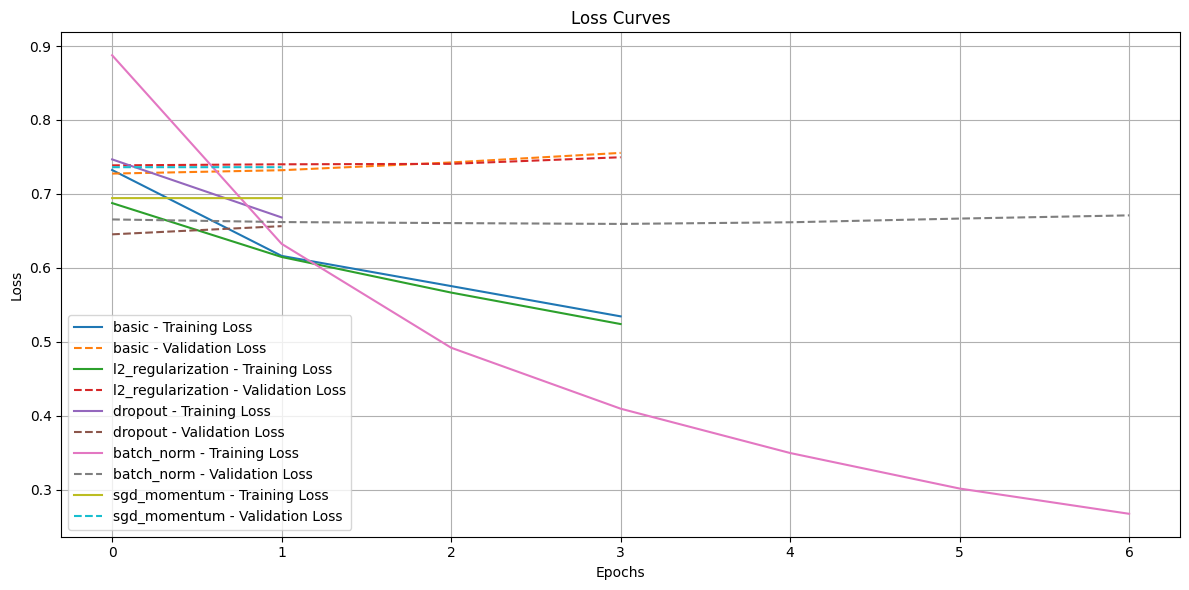

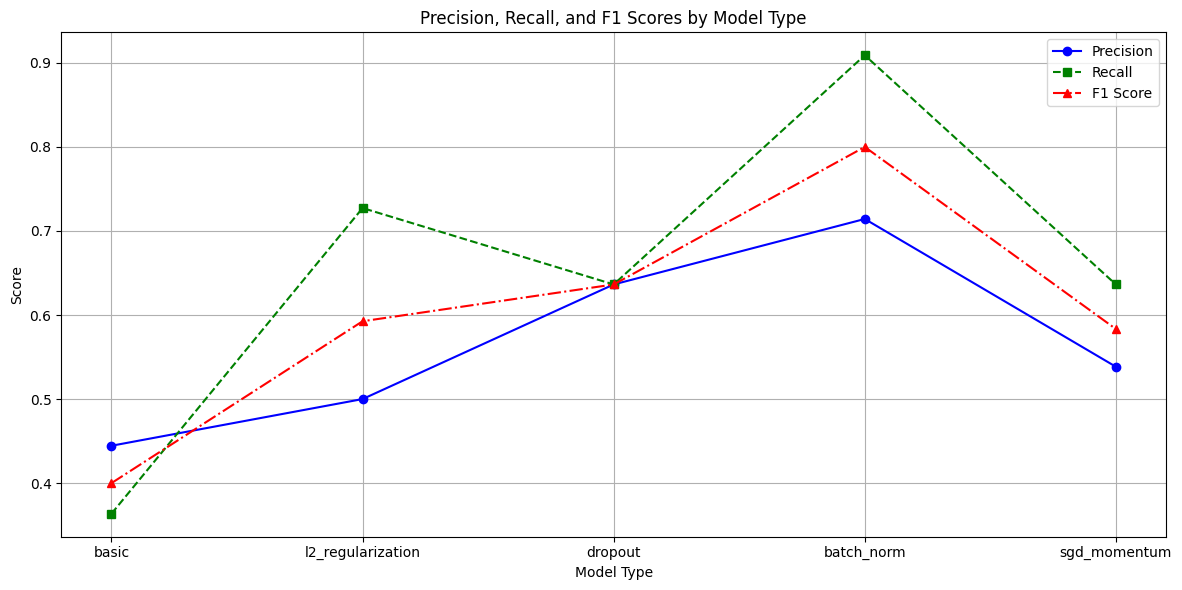

In [130]:
# Define function to train and evaluate the models
def train_and_evaluate_model(model_type, X_train, y_train, X_val, y_val, best_hps):
    # Define the model with the best hyperparameters
    model = define_healthcare_model(input_shape=X_train.shape[1], model_type=model_type, hp=best_hps)

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=best_hps['tuner/epochs'],  # Corrected this line
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Get final accuracy
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy for {model_type}: {final_train_accuracy:.4f}")
    print(f"Final Validation Accuracy for {model_type}: {final_val_accuracy:.4f}")

    # Predict the validation set
    y_val_pred = model.predict(X_val)
    y_val_pred = (y_val_pred > 0.5).astype(int)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"Precision for {model_type}: {precision:.4f}")
    print(f"Recall for {model_type}: {recall:.4f}")
    print(f"F1 Score for {model_type}: {f1:.4f}")

    return history, precision, recall, f1

# Example to train and evaluate all models
model_types = ["basic", "l2_regularization", "dropout", "batch_norm", "sgd_momentum"]
all_histories = {}
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate models
for model_type in model_types:
    print(f"\nTraining and evaluating {model_type}...")

    # Reinitialize the tuner for each model type
    tuner = kt.Hyperband(
        lambda hp: define_healthcare_model(input_shape=49, model_type=model_type, hp=hp),
        objective='val_accuracy',
        max_epochs=15,  # Increased max epochs for better convergence
        factor=3,
        directory='kt_dir',
        project_name=model_type
    )

    # Perform hyperparameter search
    tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

    # Get the best hyperparameters for this model type
    best_hps = tuner.get_best_hyperparameters(1)[0]  # Get the best hyperparameters for the model type

    # Train and evaluate the model with the best hyperparameters
    history, precision, recall, f1 = train_and_evaluate_model(model_type, X_train, y_train, X_val, y_val, best_hps)

    all_histories[model_type] = history
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot loss curves
plt.figure(figsize=(12, 6))
for model_type, history in all_histories.items():
    plt.plot(history.history['loss'], label=f"{model_type} - Training Loss")
    plt.plot(history.history['val_loss'], label=f"{model_type} - Validation Loss", linestyle='--')

plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot precision, recall, and F1 scores
plt.figure(figsize=(12, 6))
plt.plot(model_types, precision_scores, label="Precision", marker='o', linestyle='-', color='blue')
plt.plot(model_types, recall_scores, label="Recall", marker='s', linestyle='--', color='green')
plt.plot(model_types, f1_scores, label="F1 Score", marker='^', linestyle='-.', color='red')

plt.title("Precision, Recall, and F1 Scores by Model Type")
plt.xlabel("Model Type")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [131]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def define_model_2(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_shape,)))
    model.add(Dropout(0.3))  # Dropout for regularization
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def define_model_3(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(BatchNormalization())  # Batch Normalization for regularization
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def define_model_4(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model



Training and evaluating model_2...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.4578 - loss: 1.3768 - val_accuracy: 0.4500 - val_loss: 1.3254
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4711 - loss: 1.3458 - val_accuracy: 0.4500 - val_loss: 1.2967
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5039 - loss: 1.2459 - val_accuracy: 0.4500 - val_loss: 1.2744
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5836 - loss: 1.2058 - val_accuracy: 0.4500 - val_loss: 1.2555
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5188 - loss: 1.2440 - val_accuracy: 0.4500 - val_loss: 1.2386
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6398 - loss: 1.1507 - val_accuracy: 0.5000 - val_loss: 1.2228
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5844 - loss: 1.1731 - val_accuracy: 0.5000 - val_loss: 1.2113
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7297 - loss: 1.1235 - val_accuracy: 0.6000 - val_loss: 1.2001
Epoch 9/15

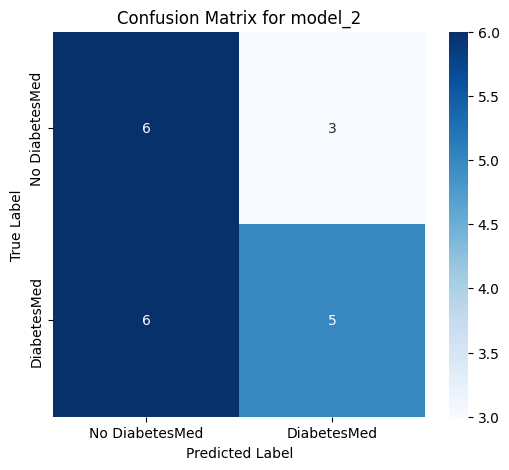

Classification Report for model_2:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.62      0.45      0.53        11

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20


Training and evaluating model_3...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.4758 - loss: 0.8205 - val_accuracy: 0.5500 - val_loss: 0.7023
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5594 - loss: 0.7706 - val_accuracy: 0.6000 - val_loss: 0.7048
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5516 - loss: 0.7023 - val_accuracy: 0.6000 - val_loss: 0.7138
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5789 - loss: 0.6668 - val_accuracy: 0.5500 - val_loss: 0.7245
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


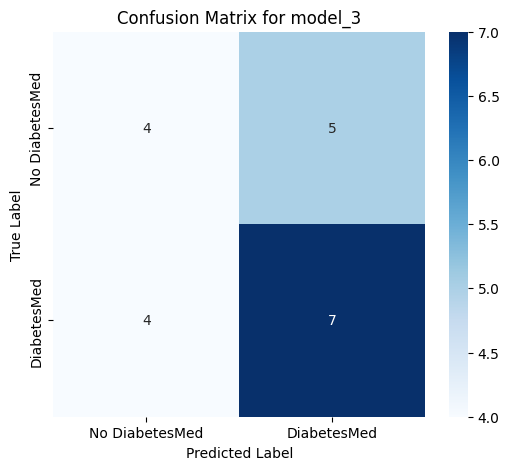

Classification Report for model_3:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.58      0.64      0.61        11

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20


Training and evaluating model_4...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.6641 - loss: 0.6748 - val_accuracy: 0.6000 - val_loss: 0.6923
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6773 - loss: 0.6361 - val_accuracy: 0.5500 - val_loss: 0.6970
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7289 - loss: 0.6234 - val_accuracy: 0.5500 - val_loss: 0.7023
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8125 - loss: 0.5923 - val_accuracy: 0.5000 - val_loss: 0.7087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


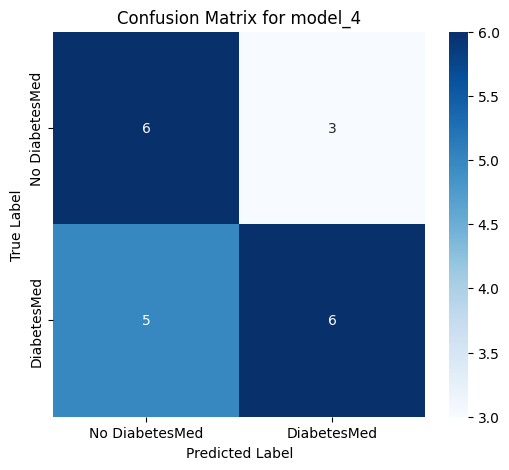

Classification Report for model_4:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



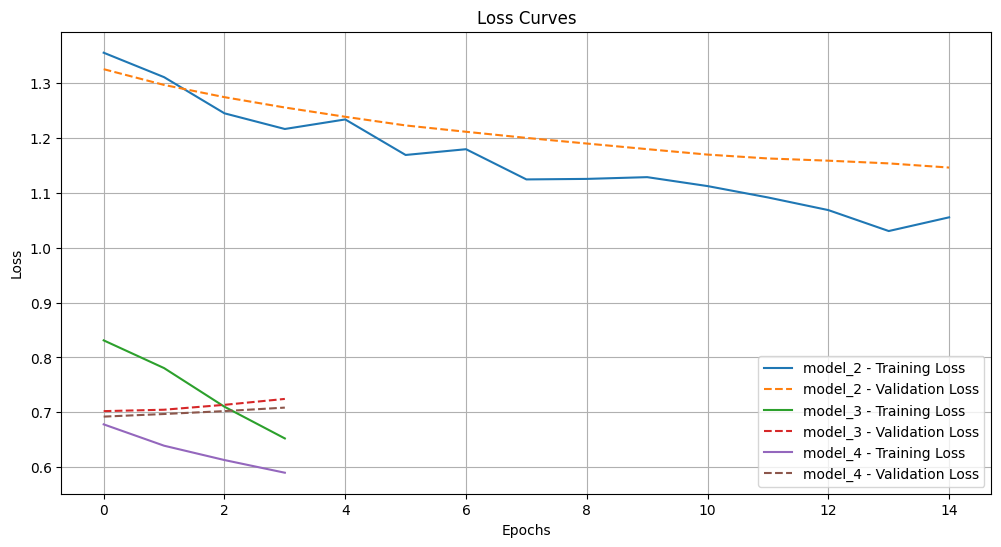

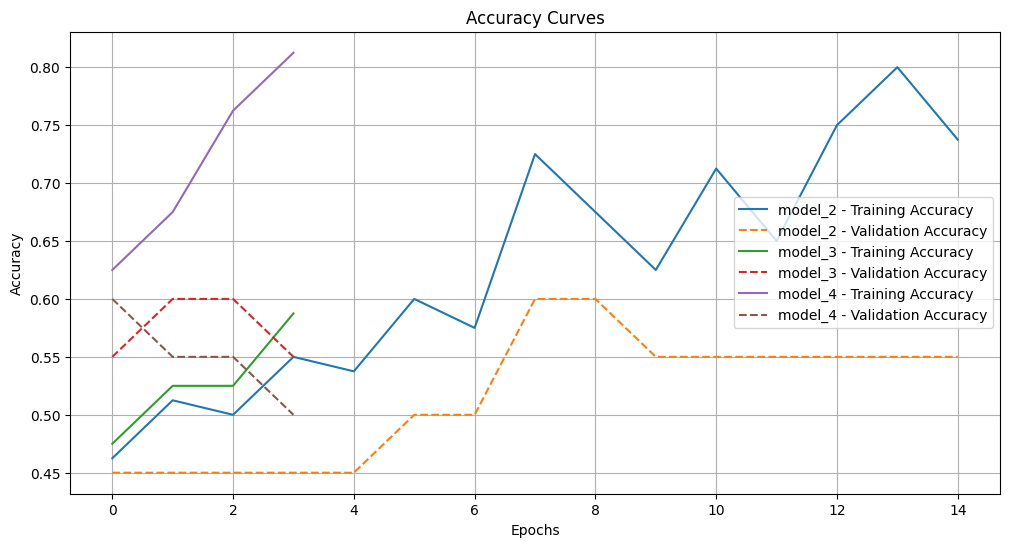

In [135]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping

# Function to train, evaluate, and plot confusion matrices
def train_and_evaluate_optimized_model(model_type, X_train, y_train, X_val, y_val):
    # Define the model
    if model_type == 'model_2':
        model = define_model_2(input_shape=X_train.shape[1])
    elif model_type == 'model_3':
        model = define_model_3(input_shape=X_train.shape[1])
    elif model_type == 'model_4':
        model = define_model_4(input_shape=X_train.shape[1])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=15,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict the validation set
    y_val_pred = model.predict(X_val)
    y_val_pred = (y_val_pred > 0.5).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No DiabetesMed', 'DiabetesMed'], yticklabels=['No DiabetesMed', 'DiabetesMed'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_type}')
    plt.show()

    # Print classification report
    print(f"Classification Report for {model_type}:\n{classification_report(y_val, y_val_pred)}")

    return history

# Train and evaluate all models
model_types = ['model_2', 'model_3', 'model_4']
all_histories = {}

for model_type in model_types:
    print(f"\nTraining and evaluating {model_type}...")
    history = train_and_evaluate_optimized_model(model_type, X_train, y_train, X_val, y_val)
    all_histories[model_type] = history

# Plot loss curves
plt.figure(figsize=(12, 6))
for model_type, history in all_histories.items():
    plt.plot(history.history['loss'], label=f"{model_type} - Training Loss")
    plt.plot(history.history['val_loss'], label=f"{model_type} - Validation Loss", linestyle='--')

plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy curves
plt.figure(figsize=(12, 6))
for model_type, history in all_histories.items():
    plt.plot(history.history['accuracy'], label=f"{model_type} - Training Accuracy")
    plt.plot(history.history['val_accuracy'], label=f"{model_type} - Validation Accuracy", linestyle='--')

plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [145]:
# Create the directory if it doesn't exist
import os

os.makedirs("saved_models", exist_ok=True)

# Save model_2 in both formats
model_2.save("saved_models/model_2.keras")  # New format
print("Model 2 saved as 'saved_models/model_2.keras'.")

# Save model_3 in both formats
model_3.save("saved_models/model_3.keras")
print("Model 3 saved as 'saved_models/model_3.keras'.")

# Save model_4 in both formats
model_4.save("saved_models/model_4.keras")
print("Model 4 saved as 'saved_models/model_4.keras'.")


Model 2 saved as 'saved_models/model_2.keras'.
Model 3 saved as 'saved_models/model_3.keras'.
Model 4 saved as 'saved_models/model_4.keras'.


Confusion Matrix:
 [[ 4608     0]
 [    0 15746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4608
           1       1.00      1.00      1.00     15746

    accuracy                           1.00     20354
   macro avg       1.00      1.00      1.00     20354
weighted avg       1.00      1.00      1.00     20354



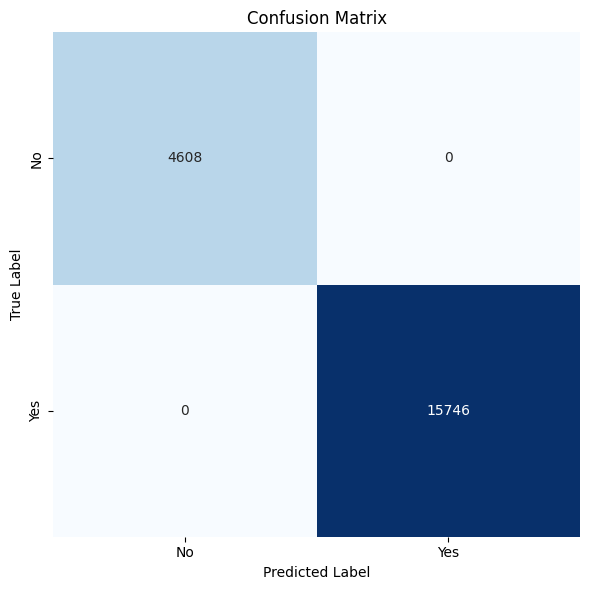

In [191]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib  # To save the model

# Load the dataset
df = pd.read_csv('diabetic_data.csv')

# Handle missing values in the target variable 'diabetesMed'
df["diabetesMed"] = df["diabetesMed"].fillna(df["diabetesMed"].mode()[0])

# Label encode categorical columns, excluding 'diabetesMed'
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_columns:
    if col != 'diabetesMed':
        df[col] = encoder.fit_transform(df[col])

# Ensure 'diabetesMed' is binary (0 = No, 1 = Yes)
df["diabetesMed"] = df["diabetesMed"].map({'No': 0, 'Yes': 1})

# Define features (X) and target (y)
X = df.drop(columns=["diabetesMed"])
y = df["diabetesMed"]

# Handle missing values in features (fill with column mean)
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Simpler Support Vector Machine (SVM) Model
svm_model = SVC(C=1, kernel='linear')  # Simpler hyperparameters

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))

# Save the best model
model_path = 'saved_models/svm_best_model.pkl'
joblib.dump(svm_model, model_path)

# Save the scaler
scaler_path = 'saved_models/scaler.pkl'
joblib.dump(scaler, scaler_path)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [192]:
!ls -lh


total 19M
-rw-r--r-- 1 root root  54K Feb 20 20:03 basic_best_model.h5
-rw-r--r-- 1 root root  64K Feb 20 20:03 batch_norm_best_model.h5
-rw-r--r-- 1 root root  19M Feb 20 16:53 diabetic_data.csv
-rw-r--r-- 1 root root  56K Feb 20 20:03 dropout_best_model.h5
drwxr-xr-x 7 root root 4.0K Feb 20 18:12 kt_dir
-rw-r--r-- 1 root root  54K Feb 20 20:03 l2_regularization_best_model.h5
drwxr-xr-x 3 root root 4.0K Feb 20 17:01 my_dir
-rw-r--r-- 1 root root  97K Feb 20 16:55 refined_model_architecture.png
drwxr-xr-x 1 root root 4.0K Feb 18 14:20 sample_data
drwxr-xr-x 2 root root 4.0K Feb 20 22:57 saved_models
-rw-r--r-- 1 root root  50K Feb 20 20:03 sgd_momentum_best_model.h5
drwxr-xr-x 5 root root 4.0K Feb 20 18:31 tune_results


In [193]:
import os
print(os.listdir('saved_models'))


['L2_Regularization_model.h5', 'healthcare_model.h5', 'model_3.keras', 'model_2.h5', 'model_4.keras', 'Dropout_Regularization_model.h5', 'SGD_with_Momentum_model.keras', 'batch_norm_model.keras', 'SGD_with_Momentum_model.h5', 'basic_model.keras', 'Batch_Normalization_model.h5', 'model_3.h5', 'sgd_momentum_model.keras', 'model_2.keras', 'svm_best_model.pkl', 'l2_regularization_model.keras', 'Basic_Model_model.h5', 'model_4.h5', 'scaler.pkl', 'dropout_model.keras']


In [194]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, f1_score
import numpy as np

# List of model files
model_files = [
    'L2_Regularization_model.h5', 'healthcare_model.h5', 'model_3.keras', 'model_2.h5',
    'model_4.keras', 'Dropout_Regularization_model.h5', 'SGD_with_Momentum_model.keras',
    'batch_norm_model.keras', 'SGD_with_Momentum_model.h5', 'basic_model.keras',
    'Batch_Normalization_model.h5', 'model_3.h5', 'sgd_momentum_model.keras',
    'model_2.keras', 'l2_regularization_model.keras', 'Basic_Model_model.h5',
    'model_4.h5', 'dropout_model.keras'
]

# Initialize variables to track the best model
best_f1_score = 0
best_model = None

# Loop through each model, load it, and evaluate its performance
for model_file in model_files:
    try:
        model = load_model(f'saved_models/{model_file}')

        # Make predictions on the test set
        y_pred = model.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int)

        # Calculate F1-score
        f1 = f1_score(y_test, y_pred)
        print(f'F1-score for {model_file}: {f1}')

        # Track the best model
        if f1 > best_f1_score:
            best_f1_score = f1
            best_model = model_file

    except Exception as e:
        print(f"Error loading model {model_file}: {e}")

# Print the best model based on F1-score
print(f'The best model based on F1-score is: {best_model} with F1-score: {best_f1_score}')


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


F1-score for L2_Regularization_model.h5: 0.47513719576054625
Error loading model healthcare_model.h5: Exception encountered when calling Sequential.call().

Input 0 of layer "Preprocessing" is incompatible with the layer: expected axis -1 of input shape to have value 2471, but received input with shape (32, 49)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 49), dtype=float32)
  • training=False
  • mask=None
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


F1-score for model_3.keras: 0.4658751174510976
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for model_2.h5: 0.7047332306399664
 46/637 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


F1-score for model_4.keras: 0.5821442805898764
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for Dropout_Regularization_model.h5: 0.43785980358956994
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for SGD_with_Momentum_model.keras: 0.41144884904515105


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


F1-score for batch_norm_model.keras: 0.004430379746835443
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for SGD_with_Momentum_model.h5: 0.47985599177095833
 46/637 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


F1-score for basic_model.keras: 0.22435793017320954
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


F1-score for Batch_Normalization_model.h5: 0.491565618148463
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for model_3.h5: 0.4658751174510976
 46/637 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for sgd_momentum_model.keras: 0.4342099245369312
 47/637 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for model_2.keras: 0.7047332306399664
 49/637 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


F1-score for l2_regularization_model.keras: 0.5105240732850448
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


F1-score for Basic_Model_model.h5: 0.48722159066986653
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1-score for model_4.h5: 0.5821442805898764
 46/637 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1-score for dropout_model.keras: 0.8113155893536121
The best model based on F1-score is: dropout_model.keras with F1-score: 0.8113155893536121


In [195]:

def make_predictions(model_path, X):
    # Load the trained model
    model = load_model(model_path)

    # Make predictions
    predictions = model.predict(X)

    # If the model outputs probabilities (
    if predictions.shape[-1] == 1:
        predictions_binary = (predictions > 0.5).astype("int32")
    else:
        predictions_binary = np.argmax(predictions, axis=1)

    return predictions_binary

# Example of how to call the function
model_path = 'saved_models/dropout_model.keras'
predictions = make_predictions(model_path, X_test)

# Now you can use predictions for further evaluation or processing
print(predictions)


 46/637 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


Congratulations!!
